In [1]:
from captcha_competition.data import load_raw_data
X_train, y_train, X_val, y_val = load_raw_data()

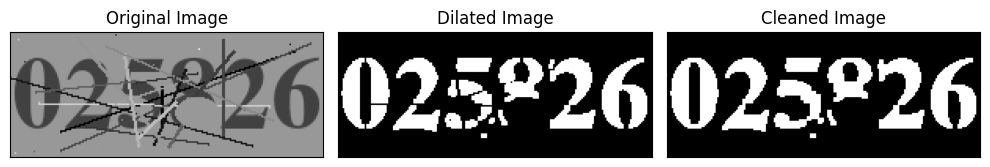

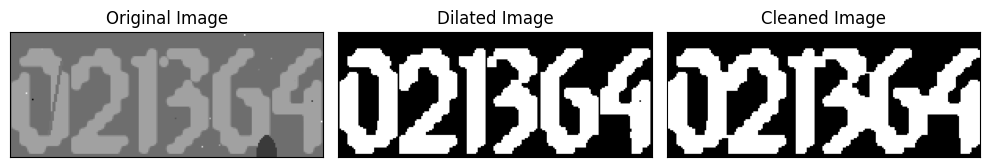

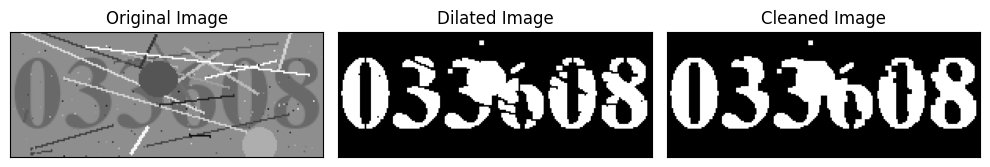

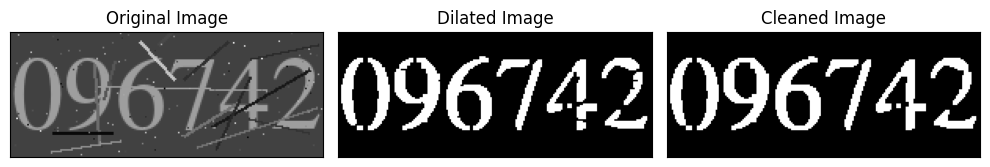

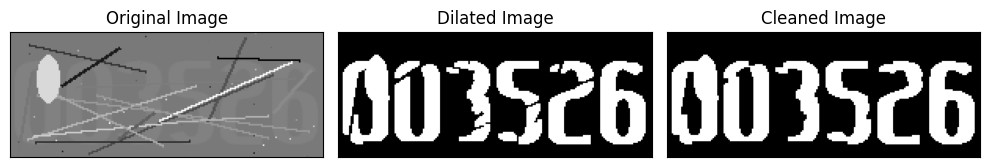

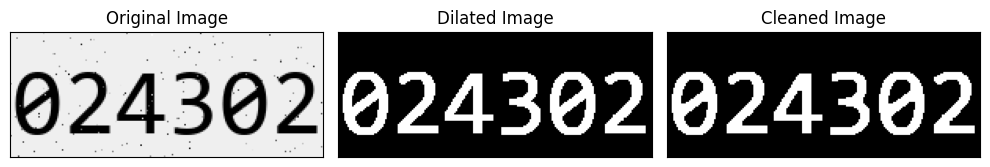

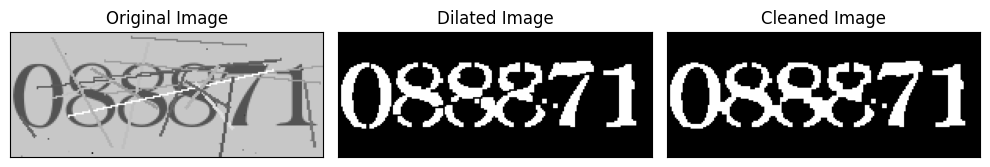

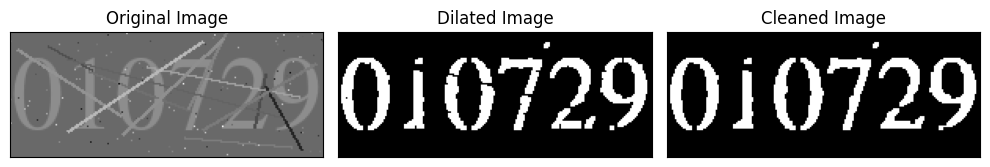

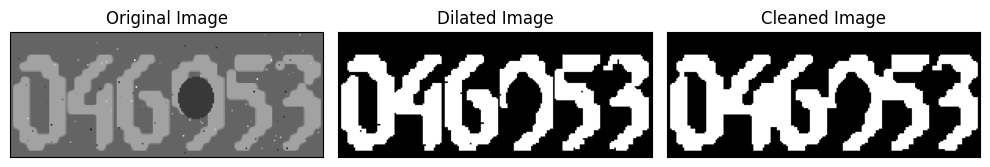

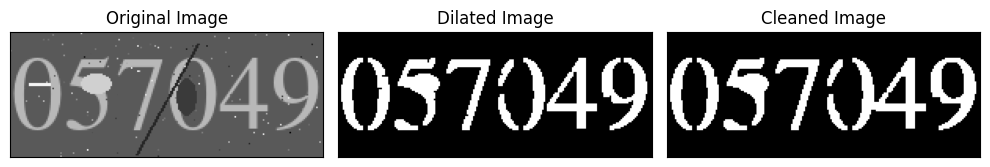

In [2]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

for i in range(10):
    
    index = random.randrange(10000)
    
    image = cv2.cvtColor(X_train[index], cv2.COLOR_BGR2GRAY)
    
    # Binarize
    # Top most left pixel is the background color
    background_color = image[0,0]
    # If the background color is dark and the text is light
    if background_color < 128:
        ret, binary = cv2.threshold(image, background_color, 255, cv2.THRESH_BINARY)
    # If the background color is light and the text is dark
    else:
        ret, binary = cv2.threshold(image, background_color-1, 255, cv2.THRESH_BINARY_INV)
    
     # Close the image: dilate and then erode to remove dots and lines
    kernel = np.ones((3, 3), np.uint8)
    dilated = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
    
    kernel = np.ones((3, 3), np.uint8)
    cleaned = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)

    # Display both the original and binary images
    plt.figure(figsize=(10, 6))

    plt.subplot(131), plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(132), plt.imshow(dilated, cmap='gray')
    plt.title('Dilated Image')
    plt.xticks([]), plt.yticks([])

    plt.subplot(133), plt.imshow(cleaned, cmap='gray')
    plt.title('Cleaned Image')
    plt.xticks([]), plt.yticks([])

    plt.tight_layout()
    plt.show()

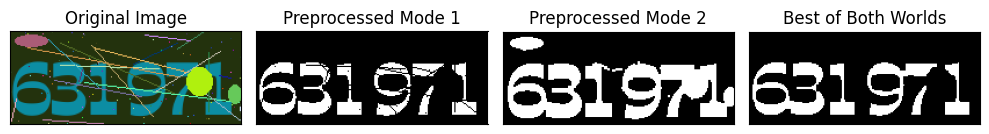

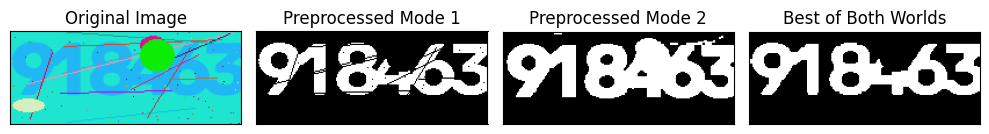

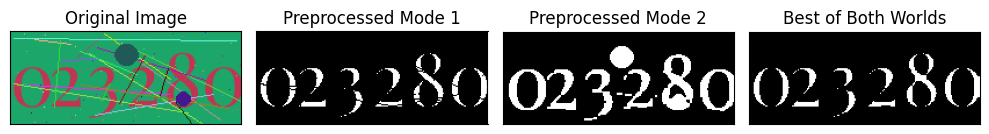

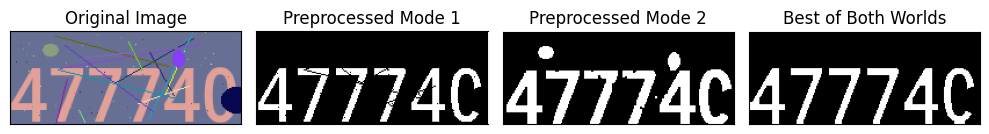

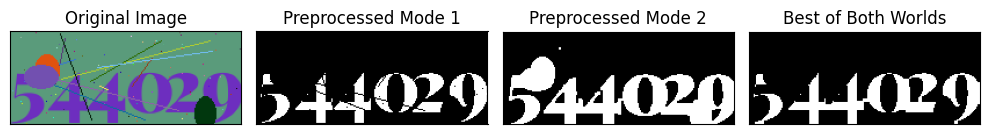

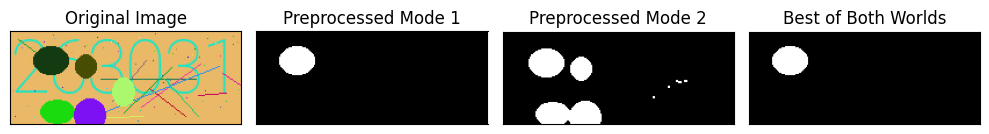

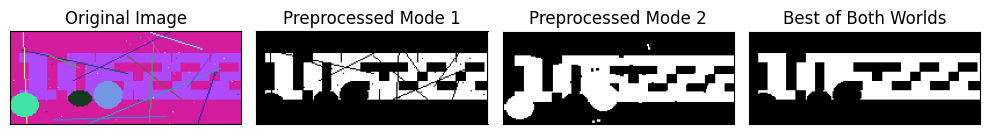

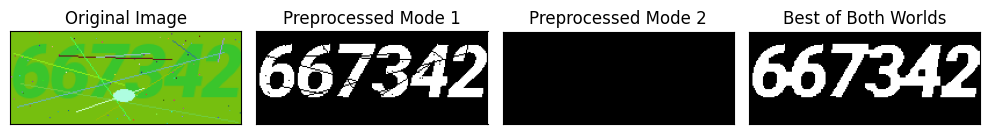

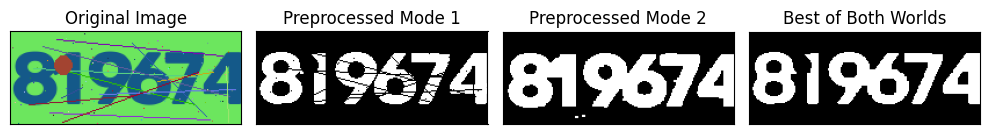

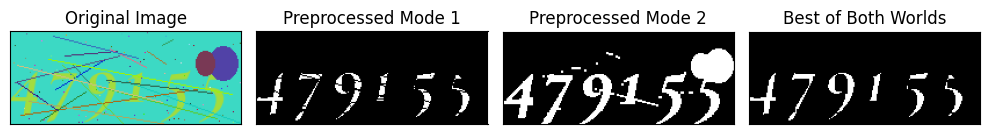

In [1]:
from captcha_competition.data import remove_bg_v1, cleaned_image, preprocessing_image
from captcha_competition.data import generate_captcha_image
import matplotlib.pyplot as plt

for i in range(10):
    img = generate_captcha_image()
    new_image = remove_bg_v1(img[0])
    new_image2 = cleaned_image(img[0])
    new_image3 = preprocessing_image(img[0])

    plt.figure(figsize=(10, 6))

    plt.subplot(141), plt.imshow(img[0], cmap='gray')
    plt.title('Original Image')
    plt.xticks([]), plt.yticks([])

    plt.subplot(142), plt.imshow(new_image, cmap='gray')
    plt.title('Preprocessed Mode 1')
    plt.xticks([]), plt.yticks([])

    plt.subplot(143), plt.imshow(new_image2, cmap='gray')
    plt.title('Preprocessed Mode 2')
    plt.xticks([]), plt.yticks([])
    
    plt.subplot(144), plt.imshow(new_image3, cmap='gray')
    plt.title('Best of Both Worlds')
    plt.xticks([]), plt.yticks([])

    plt.tight_layout()
    plt.show()